In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("Avian Influenza (HPAI)edit.csv")

In [9]:
df.head()

,_id,Scientific_Name,Common_Name,Date,Year,Month,Day,Time,Country,Country_State_County,State,County,Locality,Latitude,Longitude,Parent_Species,target_H5_HPAI
0,16290,Spatula clypeata,Northern Shoveler,2020-01-27T00:00:00,2020,1,27,1406,Ireland,IE-L-DN,Leinster,Dublin,North Bull Island NR--causeway,53.3726,-6.1591,Spatula clypeata,0
1,16291,Anas acuta,Northern Pintail,2020-01-27T00:00:00,2020,1,27,1406,Ireland,IE-L-DN,Leinster,Dublin,North Bull Island NR--causeway,53.3726,-6.1591,Anas acuta,1
2,16292,Anas acuta,Northern Pintail,2020-01-27T00:00:00,2020,1,27,1406,Ireland,IE-L-DN,Leinster,Dublin,North Bull Island NR--causeway,53.3726,-6.1591,Anas acuta,1
3,16293,Anas acuta,Northern Pintail,2020-01-27T00:00:00,2020,1,27,1406,Ireland,IE-L-DN,Leinster,Dublin,North Bull Island NR--causeway,53.3726,-6.1591,Anas acuta,1
4,16294,Anas crecca crecca,Green-winged Teal (Eurasian),2020-01-27T00:00:00,2020,1,27,1406,Ireland,IE-L-DN,Leinster,Dublin,North Bull Island NR--causeway,53.3726,-6.1591,Anas crecca,0


In [10]:
df.describe()

,_id,Year,Month,Day,Time,Latitude,Longitude,target_H5_HPAI
count,15.000000,15.0,15.0,15.0,15.000000,15.000000,15.000000,15.000000
mean,16297.000000,2020.0,1.0,27.0,1345.666667,53.425367,-7.493133,0.200000
std,4.472136,0.0,0.0,0.0,88.318957,0.077242,1.952825,0.414039
min,16290.000000,2020.0,1.0,27.0,1225.000000,53.372600,-10.161200,0.000000
25%,16293.500000,2020.0,1.0,27.0,1225.000000,53.372600,-10.161200,0.000000
50%,16297.000000,2020.0,1.0,27.0,1406.000000,53.372600,-6.159100,0.000000
75%,16300.500000,2020.0,1.0,27.0,1406.000000,53.530900,-6.159100,0.000000
max,16304.000000,2020.0,1.0,27.0,1406.000000,53.530900,-6.159100,1.000000


In [11]:
df.isnull().sum()

_id                     0
Scientific_Name         0
Common_Name             0
Date                    0
Year                    0
Month                   0
Day                     0
Time                    0
Country                 0
Country_State_County    0
State                   0
County                  0
Locality                0
Latitude                0
Longitude               0
Parent_Species          0
target_H5_HPAI          0
dtype: int64

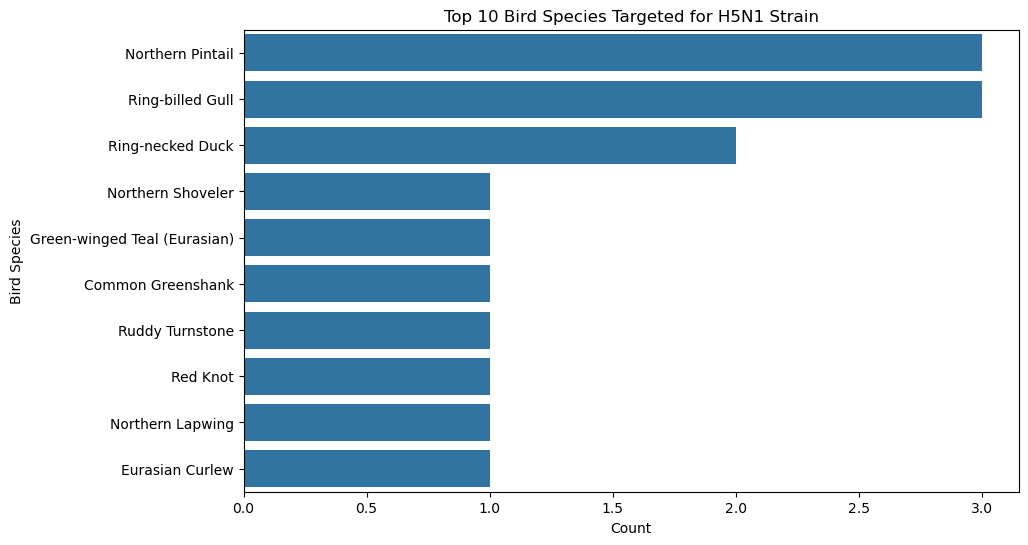

In [12]:
# Distribution of bird species targeted for H5N1 strain
plt.figure(figsize=(10, 6))
sns.countplot(y='Common_Name', data=df, order=df['Common_Name'].value_counts().index[:10])
plt.title('Top 10 Bird Species Targeted for H5N1 Strain')
plt.xlabel('Count')
plt.ylabel('Bird Species')
plt.show()

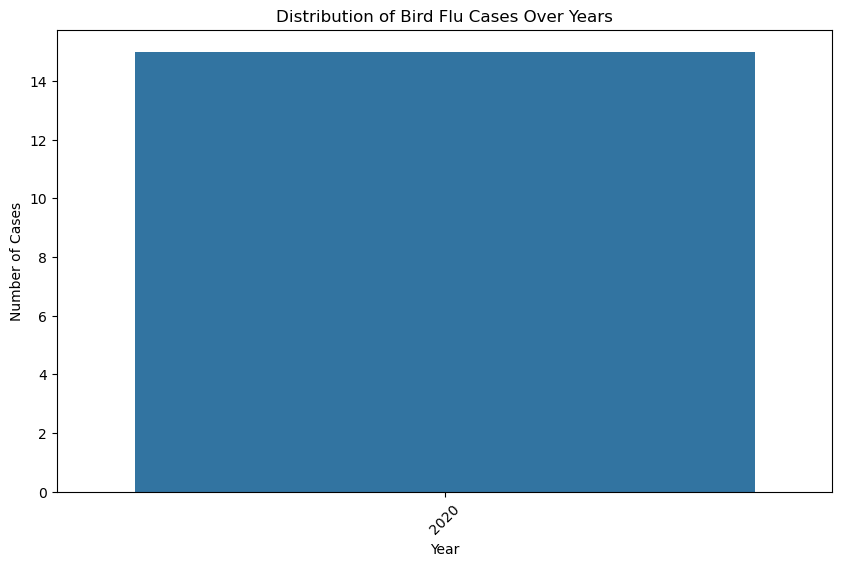

In [13]:
# Distribution of cases over years
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Distribution of Bird Flu Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

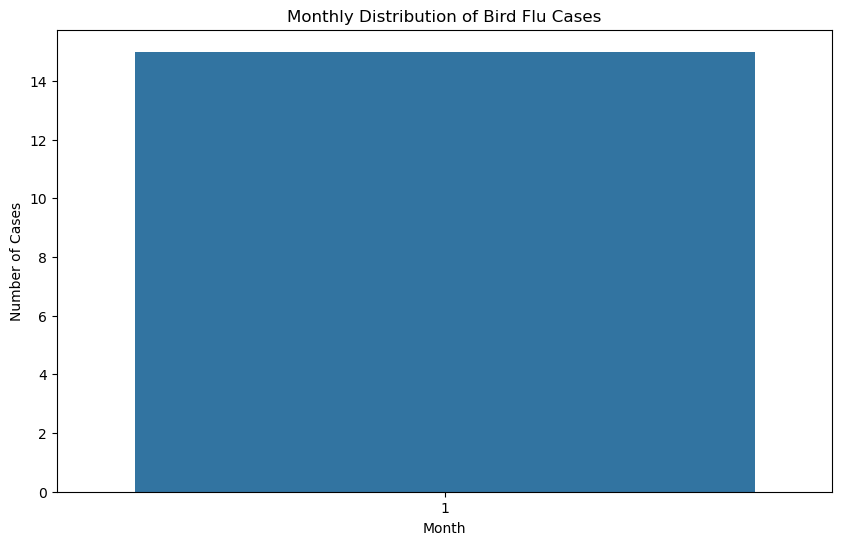

In [14]:
# Monthly Distribution of Bird Flu Cases
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df)
plt.title('Monthly Distribution of Bird Flu Cases')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

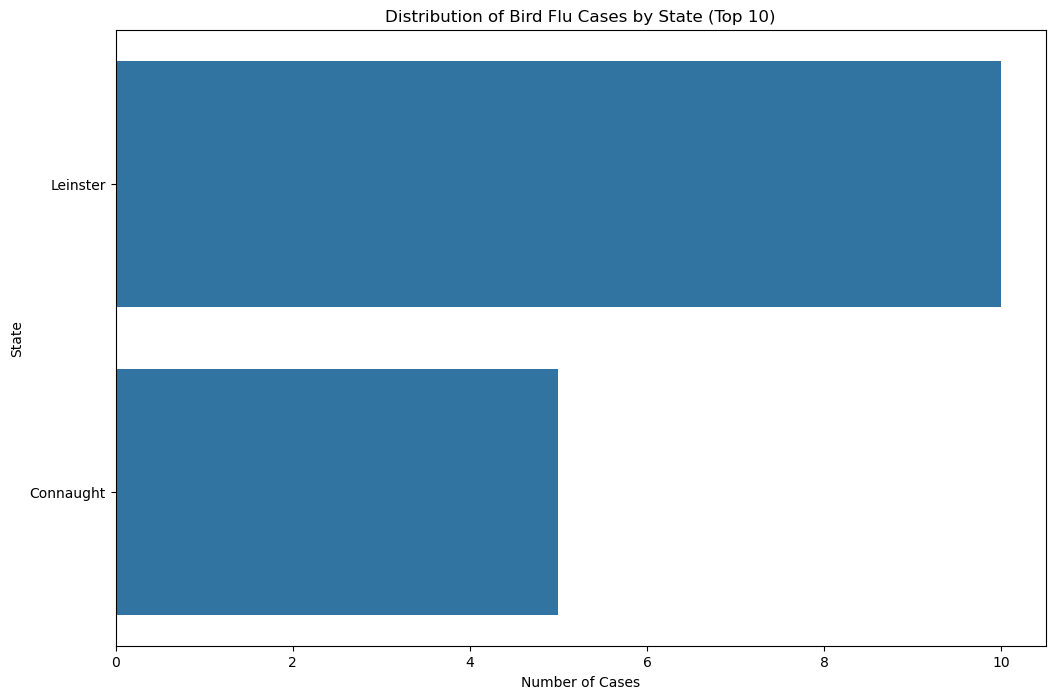

In [15]:
# Distribution of Bird Flu Cases by State
plt.figure(figsize=(12, 8))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index[:10])
plt.title('Distribution of Bird Flu Cases by State (Top 10)')
plt.xlabel('Number of Cases')
plt.ylabel('State')
plt.show()

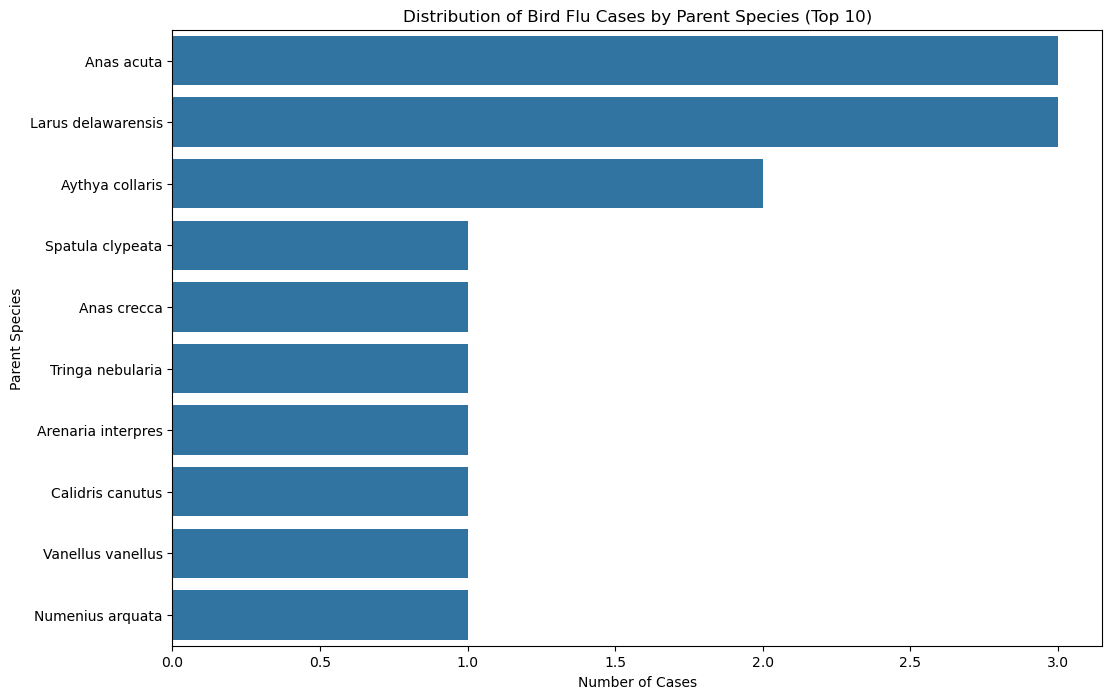

In [16]:
# Distribution of Bird Flu Cases by Parent Species
plt.figure(figsize=(12, 8))
sns.countplot(y='Parent_Species', data=df, order=df['Parent_Species'].value_counts().index[:10])
plt.title('Distribution of Bird Flu Cases by Parent Species (Top 10)')
plt.xlabel('Number of Cases')
plt.ylabel('Parent Species')
plt.show()

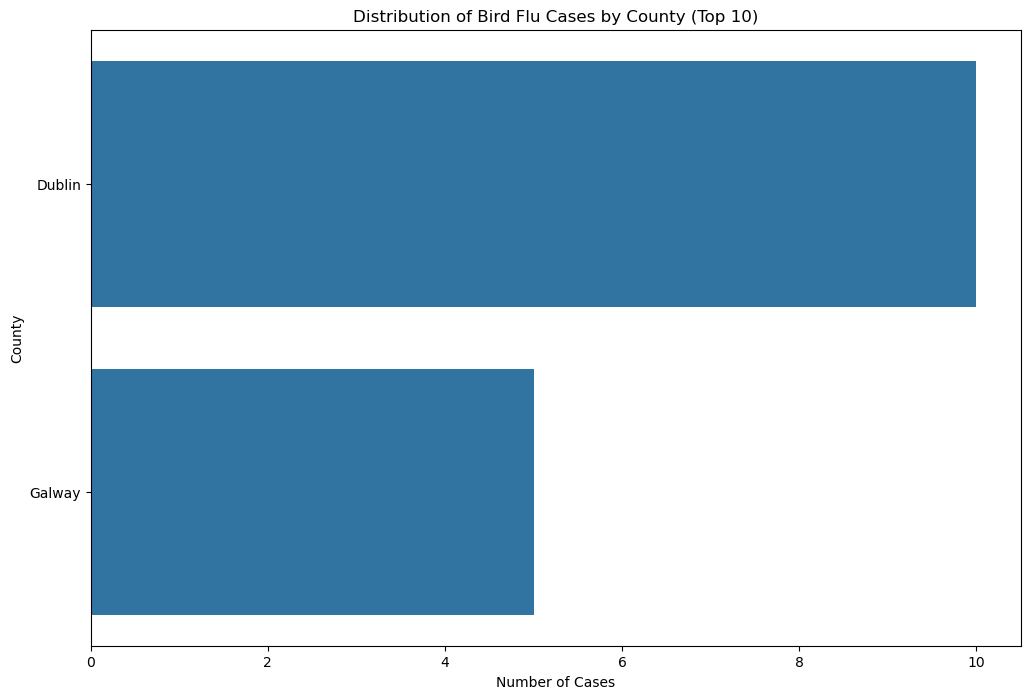

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(y='County', data=df, order=df['County'].value_counts().index[:10])
plt.title('Distribution of Bird Flu Cases by County (Top 10)')
plt.xlabel('Number of Cases')
plt.ylabel('County')
plt.show()

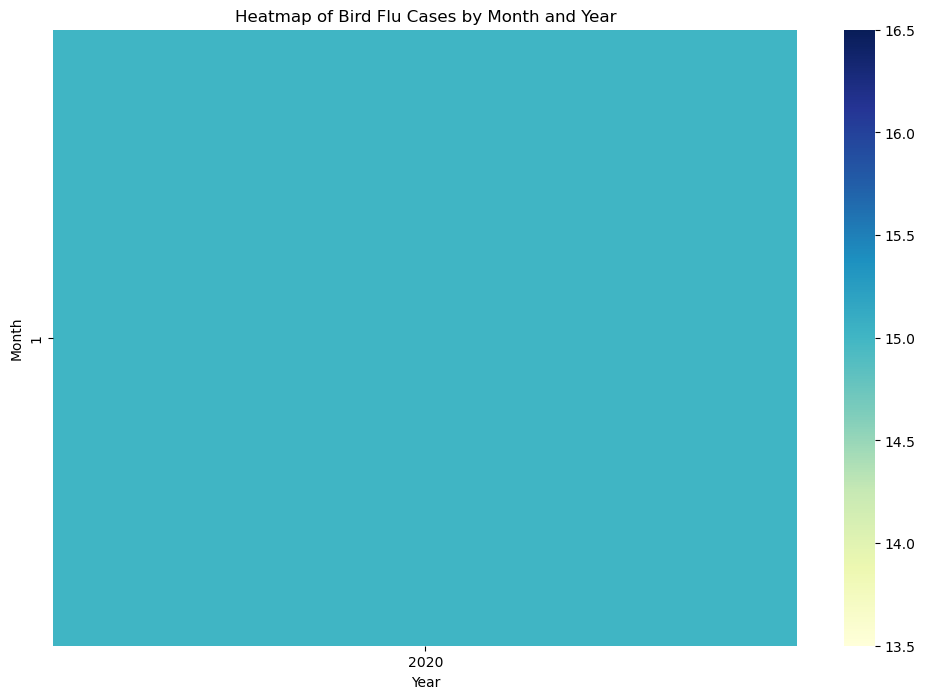

In [19]:
# Heatmap of Bird Flu Cases by Month and Year
pivot_table = df.pivot_table(index='Month', columns='Year', values='Common_Name', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Bird Flu Cases by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

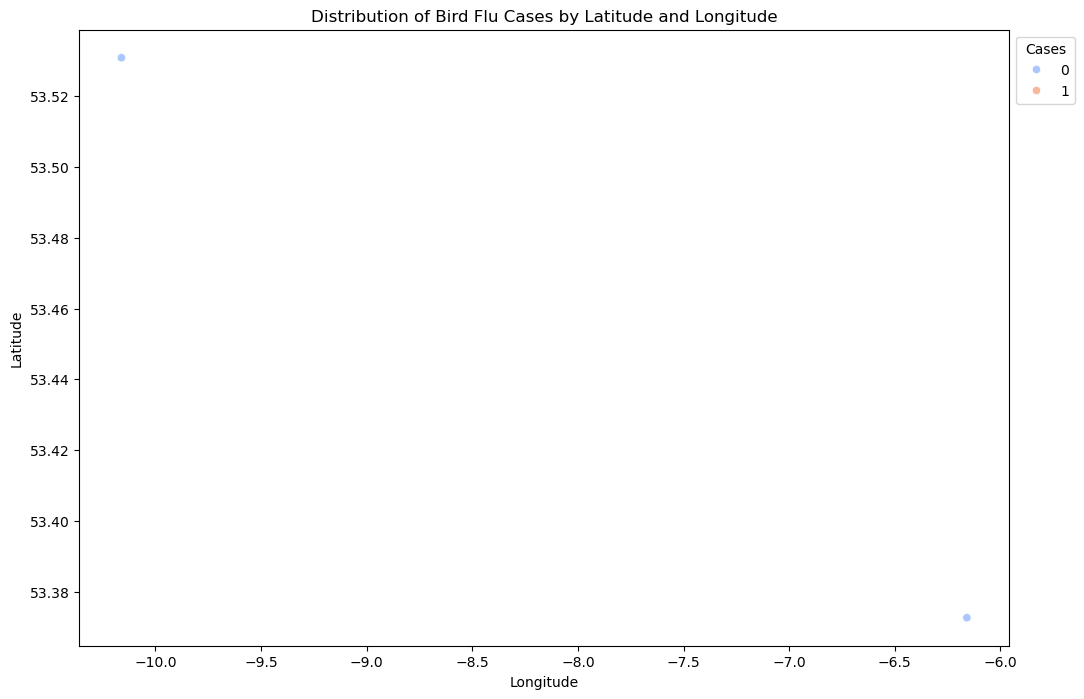

In [20]:
# Distribution of Bird Flu Cases by Latitude and Longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='target_H5_HPAI', data=df, palette='coolwarm', legend='brief')
plt.title('Distribution of Bird Flu Cases by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cases', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()